In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [6]:
ratings = pd.read_csv("ml-25m/ratings.csv")
movies = pd.read_csv("ml-25m/movies.csv")

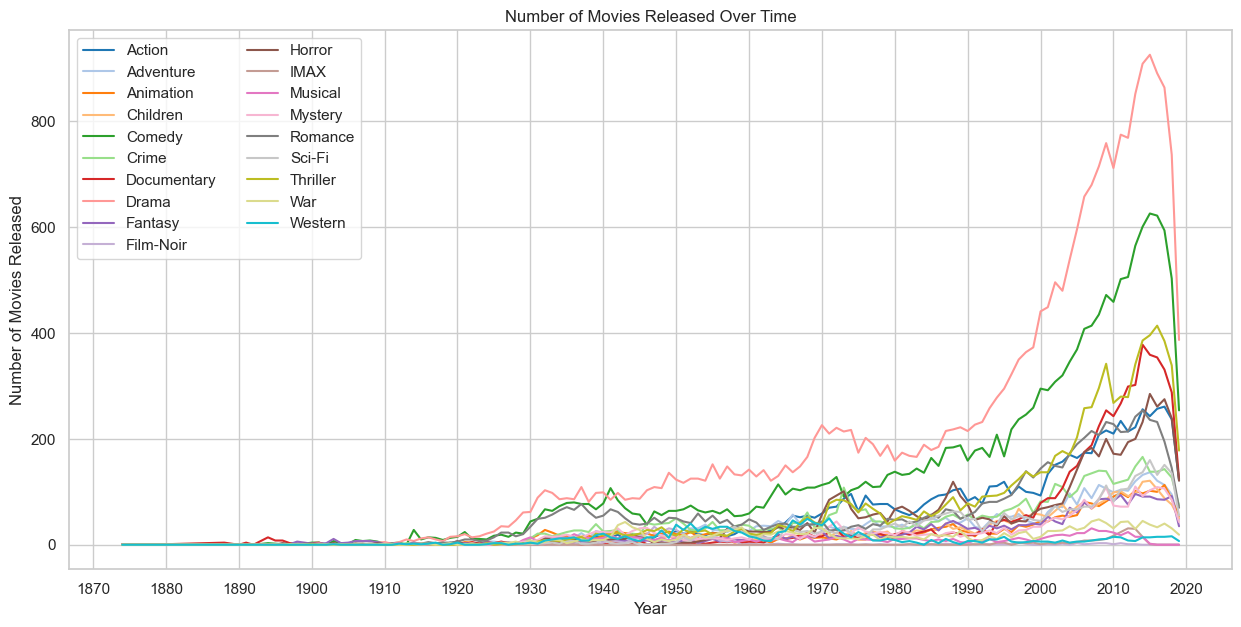

In [9]:
# Load the dataset
file_path = 'ml-25m/movies4.csv'
data = pd.read_csv(file_path)

data = data[~data['genres'].apply(ast.literal_eval).apply(lambda x: '(no genres listed)' in x)]

# Clean the genres column to a list of genres
data['genres'] = data['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

# Aggregate the data
genre_counts = data.explode('genres').groupby(['year', 'genres']).size().reset_index(name='count')

# Pivot the data for the line plot
genre_counts_pivot = genre_counts.pivot(index='year', columns='genres', values='count').fillna(0)

plt.figure(figsize=(15, 7))

# Choose a colormap
colormap = plt.cm.tab20  
color_cycle = [colormap(i) for i in range(colormap.N)]

# Assign colors from the cycle
for idx, genre in enumerate(genre_counts_pivot.columns):
    plt.plot(genre_counts_pivot.index, genre_counts_pivot[genre], label=genre, color=color_cycle[idx])

plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.legend(ncol=2)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(10)) 
plt.show()


C:\Users\FredS\AppData\Local\Temp\ipykernel_8048\2636422621.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=ratings, palette="viridis")


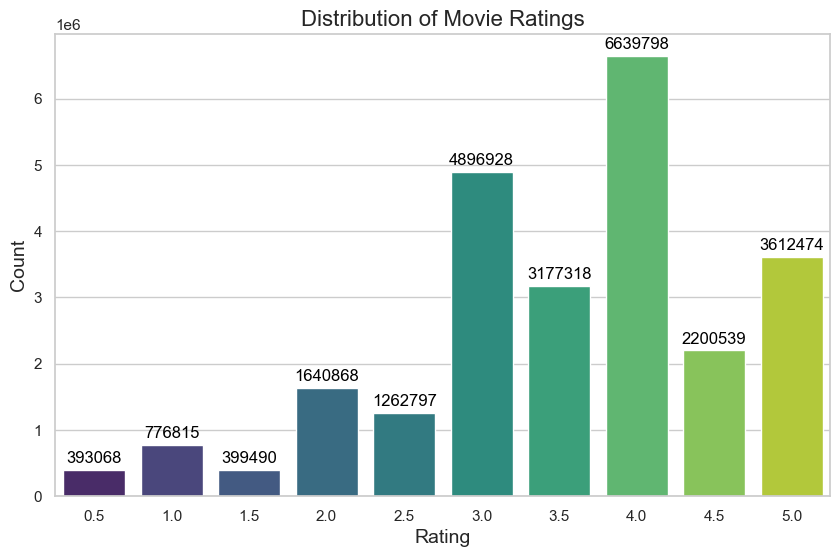

In [4]:
# Sample code to generate the improved plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the count plot with a color palette
ax = sns.countplot(x='rating', data=ratings, palette="viridis")

# Add a title and labels with increased font size
plt.title("Distribution of Movie Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()
